Analysis: The Impact of Close Friendships on Loneliness

Research Question:
What is the relationship between the number of close friends and feelings of loneliness?

In [3]:
import pandas as pd

# Load a CSV file
df = pd.read_csv('CSCS_data_anon.csv', low_memory=False)

# Select the required columns
filtered_df = df[['LONELY_ucla_loneliness_scale_score', 'CONNECTION_social_num_close_friends_grouped']]

# Remove rows with NA values in the selected columns
filtered_df = filtered_df.dropna(subset=['LONELY_ucla_loneliness_scale_score', 'CONNECTION_social_num_close_friends_grouped'])

# Display the first few rows to confirm
filtered_df.head()


,LONELY_ucla_loneliness_scale_score,CONNECTION_social_num_close_friends_grouped
4,4.0,5 or more
8,9.0,3–4
10,5.0,5 or more
13,6.0,3–4
18,6.0,3–4


In [4]:
# Check the data type
print(filtered_df['LONELY_ucla_loneliness_scale_score'].dtype)

# Display basic statistics
filtered_df['LONELY_ucla_loneliness_scale_score'].describe()


float64


count    3671.000000
mean        5.527377
std         1.751371
min         3.000000
25%         4.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: LONELY_ucla_loneliness_scale_score, dtype: float64

In [5]:
# Check unique values for CONNECTION_social_num_close_friends_grouped
filtered_df['CONNECTION_social_num_close_friends_grouped'].unique()


array(['5 or more', '3–4', '1–2', 'Presented but no response'],
      dtype=object)

In [6]:
# Filter out 'Presented but no response'
filtered_df = filtered_df[filtered_df['CONNECTION_social_num_close_friends_grouped'] != 'Presented but no response']
# Map categories to numerical values
friends_mapping = {'1–2': 1, '3–4': 2, '5 or more': 3}
filtered_df['CONNECTION_social_num_close_friends_grouped'] = filtered_df['CONNECTION_social_num_close_friends_grouped'].map(friends_mapping)
filtered_df.head()


,LONELY_ucla_loneliness_scale_score,CONNECTION_social_num_close_friends_grouped
4,4.0,3
8,9.0,2
10,5.0,3
13,6.0,2
18,6.0,2


Method:
Hypothesis Testing

Null Hypothesis (H0):
There is no significant difference in loneliness scores across the groups with different numbers of close friends (1–2, 3–4, and 5 or more).
Alternative Hypothesis (H1): 
A higher number of close friends is associated with lower loneliness scores.

Visualization:
The histogram with an overlaying density plot provides a clear visual representation of the relationship between the number of close friends and loneliness scores. The density curves for individuals with 5 or more close friends peak at lower loneliness scores, while those with fewer close friends have higher and more variable loneliness scores.

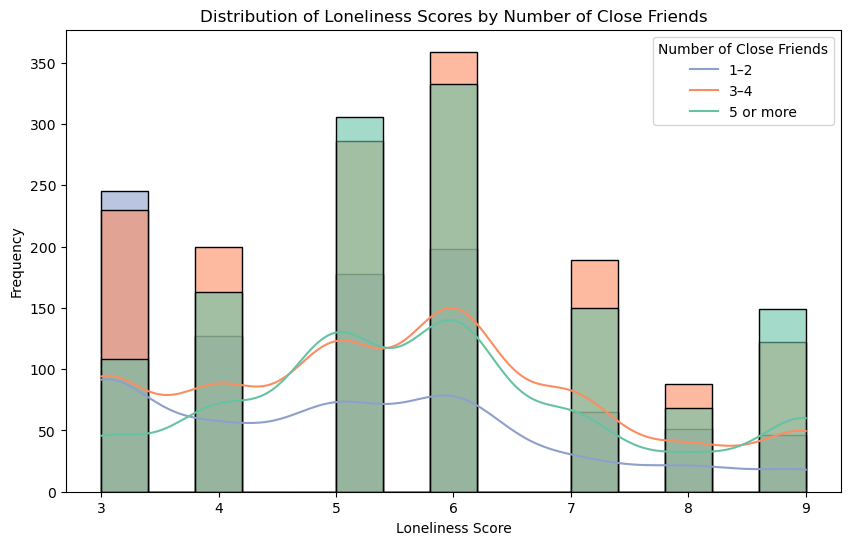

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with density plot overlay
plt.figure(figsize=(10, 6))
sns.histplot(
    data=filtered_df,
    x='LONELY_ucla_loneliness_scale_score',
    hue='CONNECTION_social_num_close_friends_grouped',
    kde=True,  # Adds the density plot
    bins=15,   # Adjust the number of bins as needed
    palette='Set2',  # Color palette for clarity
    alpha=0.6,  # Transparency for overlapping bars
)

# Add labels and title
plt.xlabel('Loneliness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Loneliness Scores by Number of Close Friends')
plt.legend(title='Number of Close Friends', labels=['1–2', '3–4', '5 or more'])
plt.show()


Observations from the Chart:

Density Curves:
Individuals with more close friends ("5 or more") generally have lower loneliness scores, as their density curve peaks at lower values.
Those with fewer close friends ("1–2") have a flatter curve, suggesting higher variability in loneliness scores.

Histogram Bars:
The groups differ in their relative frequencies, with "5 or more" friends dominating at lower loneliness scores (3–5).

1. Compare 1–2 close friends vs. 3–4 close friends

In [8]:
from scipy.stats import ttest_ind

# Group the data
group_1_2 = filtered_df[filtered_df['CONNECTION_social_num_close_friends_grouped'] == 1]['LONELY_ucla_loneliness_scale_score']
group_3_4 = filtered_df[filtered_df['CONNECTION_social_num_close_friends_grouped'] == 2]['LONELY_ucla_loneliness_scale_score']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(group_1_2, group_3_4)

# Print results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in loneliness scores between 1–2 and 3–4 close friends.")
else:
    print("No significant difference in loneliness scores between 1–2 and 3–4 close friends.")


T-statistic: 3.99
P-value: 0.0001
Significant difference in loneliness scores between 1–2 and 3–4 close friends.


2. Compare 1–2 close friends vs. 5 or more close friends

In [9]:
# Group the data
group_5_more = filtered_df[filtered_df['CONNECTION_social_num_close_friends_grouped'] == 3]['LONELY_ucla_loneliness_scale_score']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(group_1_2, group_5_more)

# Print results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in loneliness scores between 1–2 and 5 or more close friends.")
else:
    print("No significant difference in loneliness scores between 1–2 and 5 or more close friends.")


T-statistic: 10.40
P-value: 0.0000
Significant difference in loneliness scores between 1–2 and 5 or more close friends.


3. Compare 3–4 close friends vs. 5 or more close friends

In [10]:
# Perform two-sample t-test
t_stat, p_value = ttest_ind(group_3_4, group_5_more)

# Print results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in loneliness scores between 3–4 and 5 or more close friends.")
else:
    print("No significant difference in loneliness scores between 3–4 and 5 or more close friends.")


T-statistic: 6.92
P-value: 0.0000
Significant difference in loneliness scores between 3–4 and 5 or more close friends.


Hypothesis Testing Results:
1–2 vs. 3–4 close friends: Significant difference in loneliness scores (T-statistic: 3.99, P-value: 0.0001).
1–2 vs. 5 or more close friends: Significant difference in loneliness scores (T-statistic: 10.40, P-value: 0.0000).
3–4 vs. 5 or more close friends: Significant difference in loneliness scores (T-statistic: 6.92, P-value: 0.0000).

Conclusion:
The results show that individuals with more close friends report lower loneliness scores. There are significant differences in loneliness between all the groups (1–2, 3–4, and 5 or more close friends), supporting the idea that having more close friends is associated with less loneliness.

Limitations and Further Considerations:
Multiple Comparisons: Using multiple t-tests increases the risk of Type I error. A Bonferroni correction would be advisable.
Sample Bias: The analysis assumes that the sample is representative, but if there are biases (e.g., age, health), the results may not generalize.
Causal Inference: The cross-sectional nature of the data limits the ability to draw causal conclusions.